
# Métodos de interpolación
Se define la *interpolación* como un método matemático para la obtención de nuevos puntos partiendo del conocimiento de un conjunto de puntos, la idea principal es construir una función (o polinomio) a partir de los datos dados que se aproxime a la función original que los creó, la interpolación también se usa para la aproximación de una función complicada por una más simple de calcular, así ahorrando tiempo de computación. A continuación la lista de métodos que se estudiarán en este documento:

  * [Interpolación lineal](#Interpolación_lineal).
  * [Polinomio de Lagrange](#Polinomio_de_Lagrange), problemas que conlleva, y soluciones.
  * [Diferencias divididas](#Diferencias_divididas).
  * [Interpolación de Hermite](#Interpolación_de_Hermite).
  * [Interpolación con splines cúbicos](#Interpolación_con_splines_cúbicos).

la interpolación no debe confundirse con la *extrapolación* que es el proceso de estimar más allá del intervalo de observación original. Para entender mejor la interpolación veamos primero el siguiente teorema.

### Teorema de aproximación de Weierstrass
 Suponga que $f(x)$ es definida y continua en $[a,b]$, entonces, para cada $\varepsilon > 0$
 existe un Polinomio $P(x)$ con la propiedad que,

 $$|f (x) − P(x)| < \varepsilon,$$    
        
para todo $x$ en $[a,b]$.

![](Weierstrass.png)

en otras palabras, este teorema garantiza que se puede remplazar la función original por un polinomio; el cuál es más simple de calcular.

<a id='Interpolación_lineal'></a>
## Interpolación lineal

Es la más simple de todas las técnicas de interpolación y consiste en aproximar la función $y=f(x)$ con una linea recta cada par de puntos consecutivos $P=(x_i,y_i)$ y $P'=(x_{i+1},y_{i+1})$ es decir,

$$y = y_i+\frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i).$$

Note que esta ecuación se obtiene de observar que la pendiente de la recta es constante entre los puntos $P$ y $P'$, es decir, $m=\frac{y-y_i}{x-x_i}=\frac{y_{i+1}-y_i}{x_{i+1}-x_i}$. El problema es que la función no es suave y su derivada a cada punto $(x_i,y_i)$ no existe. A continuación la implementación en python.

In [ ]:
#------------------- Interpolación lineal ----------------------------
import numpy as np
import matplotlib.pyplot as plt

def Interpolacion_lineal(xi,yi, n=10):
   ''' Interpolación lineal, esta función toma 2 arrays.
       y grafica la interpolacion usando 5 puntos.'''

   for i in range(len(xi)-1):
      # dividimos el intervalo i,i+1 en n pedasos
      x = np.linspace(xi[i], xi[i+1], n, endpoint=False) # no usar el último punto

      # funcion que hace interpolacion lineal en i,i+1
      f = lambda x: yi[i]+(yi[i+1]-yi[i])/(xi[i+1]-xi[i])*(x-xi[i])

      # array con los puntos interpolados en el intervalo i,i+1
      y = np.array([ f(xk) for xk in x ]) # xk son los valores de x en i,i+1

      plt.plot(x,y,".", ms=1)  # grificar los 5 datos x,f(x) interpolados

   plt.show()

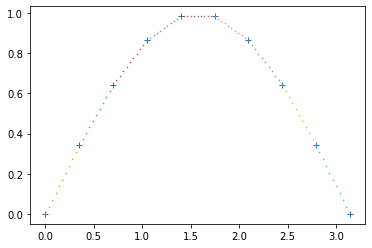

In [ ]:
# datos a interpolar, en este caso se generan por la función seno:
xi = np.linspace(0,np.pi,10)# 20 datos tomados en (0,pi)
yi = np.sin(xi)
plt.plot(xi,yi,'+')         # graficar los puntos a interpolar
Interpolacion_lineal(xi,yi) # llamamos la función que es evaluada n
                            # veces entre cada par de puntos

<a id='Polinomio_de_Lagrange'></a>
# Método de Lagrange


Este es un método clásico de interpolación y es mejor que el anterior en el sentido de que la función es suave. Considere $n+1$ puntos distintos a interpolar, y tal que

$$y_k=f (x_k) = P(x_k),\quad \text{ para }\quad k = 0, 1,... , n,$$

donde $P(x_k)$ es un polinomio dado por,

$$P(x) = f (x_0)L_0(x)+... +f(x_n)L_n(x) =\sum^n_{k=0} y_kL_k(x),$$

para cada $k = 0, 1, ... , n,$ y

$$
L_k(x) = \frac{(x − x_0)(x − x_1) ... (x − x_{k−1})(x − x_{k+1}) ... (x − x_n)}{(x_k − x_0)(x_k − x_1) ... (x_k − x_{k−1})(x_k − x_{k+1}) ... (x_k − x_n)}
=\prod_{\substack{i=0\\i\neq k}}^{n}\frac{(x − x_i)}{(x_k − x_i)},
$$

Note que $L_k(x_i) = 0$ para $i\neq k$ y $L_k(x_k) = 1$, pues $y_k=P(x_k)$.  

![](Lagrange_Lk.png)

El error es dado por,

$$
f (x) = P(x) + \frac{f^{(n+1)}(ξ(x))}{(n + 1)!} (x − x_0)(x − x_1) ... (x − x_n),
$$

donde $ξ$ es un número desconocido en $[x_0,x_n]$. Note que una vez conocido el polinomio ya se puede aproximar la función en valores de $x$ diferentes a los valores de interpolación $x_i$.


**Ejemplo 1)**: interpolar la función $f(x)=\sqrt{x}$ para los puntos $(1/2, 1, 2)$.
Se tiene que y toma los valores $(1/\sqrt{2}, 1, \sqrt{2})$, el polinomio es de grado dos dado por,

$$P_2(x)=y_0L_0+y_1L_1+y_2L_2,$$

donde,

$$
L_0(x)=\frac{(x − x_1)(x − x_2)}{(x_0 − x_1)(x_0 − x_2)}=\frac{4}{3}(x − 1)(x − 2)\\
L_1(x)=\frac{(x − x_0)(x − x_2)}{(x_1 − x_0)(x_1 − x_2)}= -2(x − 1/2)(x − 2)\\
L_2(x)=\frac{(x − x_0)(x − x_1)}{(x_2 − x_0)(x_2 − x_1)}= \frac{2}{3}(x − 1/2)(x − 1)
$$

remplazando en polinomio,

$$P_2(x)= \frac{1}{\sqrt{2}}\times\frac{4}{3}(x − 1)(x − 2) + 1\times[-2(x − 1/2)(x − 2)]+\sqrt{2}\times\frac{2}{3}(x − 1/2)(x − 1),$$

finalmente,

$$f(x)\approx P_2(x)=−0.11438\,x^2 + 0.75736\,x + 0.35702.$$

Implementación del polinomio de lagrange en python:

In [ ]:
#--------------- Polinomio  de Lagrange metodo 1 -------------------------
import numpy as np
import matplotlib.pyplot as plt


def P_n(xi,yi,x):
   '''
    *** P_n(x): polinomio de grado n evaluado en x ***
   Función del polinomio de lagrange (forma
   intuitiva de programación a partir de la definición).
   '''

   n = len(xi)          # grado del polinomio
   S = 0.0              # inicialización sumatoria
   for k in range(n):   # Sumatoria del polonomio en n+1 elementos
      # Forma intuitiva a partir de la fórmula
      L = 1
      for i in range(n):
         if i != k:
            L = L*(x-xi[i])/(xi[k]-xi[i])

      S  = S + yi[k]*L

   return S

**Ejemplo 2)** en el ejemplo 1) encontramos analíticamente que, $f(x)=\sqrt{x} \approx −0.11438\,x^2 + 0.75736\,x + 0.35702 $, al interpolar en puntos $ x_i = (1/2, 1, 2)$ y $y_i =(1/\sqrt{2}, 1, \sqrt{2})$, verifiquemos con `simpy` que la rutina anterior recupera este polinomio:

In [ ]:
import sympy as sp
sp.init_printing(use_latex='mathjax') # para imprimir de manera bonita (latex)
x=sp.Symbol('x')                      # crear variable simbolica

xi=[1/2,1,2]
yi=[1/np.sqrt(2),1,np.sqrt(2)] # yi=np.sqrt(xi), yi=xi**.5
sp.expand(P_n(xi,yi,x))
#P_n(xi,yi,x)

                     2                                          
- 0.114381916835873⋅x  + 0.757359312880715⋅x + 0.357022603955158

Si comparamos al valor análitico vemos que este es en verdad el resultado esperado para $P_2(x)$. Al final en el [complemento](#Notación_Burden) se dan códigos adicionales más eficientes para el método de lagrange.

**Ejemplo 3)** interpolar 5 datos de la función seno en el intervalo $[0,\pi]$ y comparar a la función, en este caso se generan por la función seno:

In [ ]:
#-------------------- Interpolación de Lagrange --------------------------
# Se hace una segunda función que llama P_n interpola
def Interpolacion_Lagrange(xi,yi,eps):
   ''' Esta funcion toma n+1 pares (xi,yi) de datos y los interpola
       en intervalo (x0,xn) usando el metodo de lagrange.'''

   n = len(xi)-1 # el array tiene n+1 elementos.
   print ("El grado del Pn(x) es:",n)

   x = np.arange(xi[0],xi[n], eps)  # Valores a interpolar
   P = np.array([P_n(xi,yi,xk) for xk in x]) # Polinomio P(x) de grado n evaluado en x

   plt.plot(x,P,label="Lagrange")       # Graficar interpolación de lagrange.
   plt.legend()
   plt.show()

El grado del Pn(x) es: 4


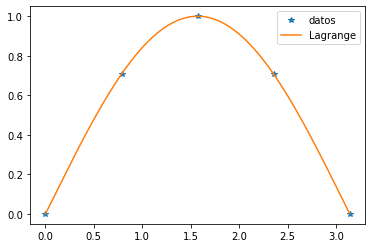

In [ ]:
# ejemplo 3
xi = np.linspace(0,np.pi,5)# 5 datos tomados en (0,pi).
yi = np.sin(xi)            # 5 datos tomados de la funcion seno.
plt.plot(xi,yi,'*',label='datos')  # graficar los puntos a interpolar

Interpolacion_Lagrange(xi,yi, 0.01) # llamamos la función

En este caso el polinomio que aproxima sen$(x)$ en $[0,\pi]$ es:


In [ ]:
x = sp.Symbol('x') # crear variable simbolica
f = sp.expand(P_n(xi,yi,x))
f
# Si desea solo 3 sifras signficativas habilite estas lineas:
d = {n : round(n,3) for n in f.atoms(sp.Number)} # dicionario con remplazos
f.xreplace(d)                                    # imprima con menos sifras

       4          3          2          
0.038⋅x  - 0.236⋅x  + 0.058⋅x  + 0.982⋅x

**Ejemplo 4)** En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

Note en la siguiente gráfica el problema de los picos que no son propios de la función sino del polinomio de grado 8 usado:

El grado del Pn(x) es: 8


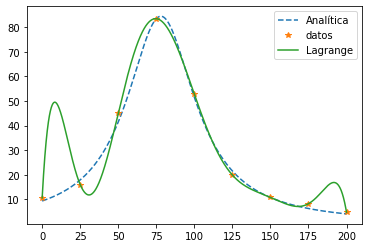

In [ ]:
# -------------- función de Breit-Wigner -----------------------
Er, Gamma = 78, 55 # en MeV
E = 75
sigma0 = 83.5*((E - Er)**2. + Gamma**2./4.)
sigma_ana = lambda E: sigma0/((E - Er)**2. + Gamma**2./4.)
E = np.linspace(0,200,1000)
plt.plot(E,sigma_ana(E),'--',label='Analítica')

#--------------- grafico de puntos a interpolar -----------------
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
plt.plot(Energia,sigma_exp,"*",label='datos')

#--------------- interpolación de lagrange ----------------------
Interpolacion_Lagrange(Energia,sigma_exp, 0.01) # llamamos la funcion

Y el polinomio es:

In [ ]:
E = sp.Symbol('x') # crear variable simbolica
f = sp.expand(P_n(Energia,sigma_exp,E)) # calcular polinomio y guardar en f

# Si desea solo 3 sifras signficativas habilite estas lineas:
d = [(n,'%0.3g'%n) for n in f.atoms(sp.Number)] # lista con sustituciones
f.subs(d)    # imprimir con menos cifras signicativas

            8             7            6            5             4           
- 1.16e-13⋅x  + 9.98e-11⋅x  - 3.54e-8⋅x  + 6.63e-6⋅x  - 0.000694⋅x  + 0.0396⋅x

3         2                
  - 1.09⋅x  + 11.4⋅x + 10.6

Note los picos que aparecen entre  0 y 25, y 175 y 200, esto es debido a que el polinomio es de grado 8.

**Tarea**: Para evitar los picos que no son propios de la teoría es mejor hacer la interpolación con polinomios de grado menor, repita el cálculo pero con polinomios de grado 2, cada 3 puntos.

**Ejercicio**: Incrementar los datos no ayudará pues se incrementa el grado del polinomio, use la función analítica, $\sigma(E)$, para generar más puntos de interpolación, por ejemplo use 18 puntos y grafique, luego aumente a 27, 50 y grafique otran vez ¿Qué observa?

In [ ]:
# Solución:
#Ei = np.linspace(0,200,18)
#Yi = sigma_ana(Ei)
#
#plt.plot(Ei,Yi, '*')
#Interpolacion_Lagrange(Ei,Yi, 0.01)


##------------ El polinomio es: ------------------------------
#E = sp.Symbol('x') # crear variable simbolica
#f = sp.expand(P_n(Ei,Yi,E)) # calcular polinomio y guardar en f
#
#d = [(n,'%0.3g'%n) for n in f.atoms(sp.Number)] # lista con sustituciones
#f.subs(d)    # imprimir con menos cifras signicativas

<a id='códigos_adicionales'></a>
## Complemento 2: códigos adicionales

Dos formas alternativas de calcular la función del polinomio de lagrange de manera más eficiente.

In [ ]:
#--------------- Polinomio  de Lagrange metodo 2 -------------------------
def P_n(x):
    '''
      *** P_n(x): polinomio de grado n evaluado en x ***
    Función del polinomio de lagrange (forma eficiente,
    al usar los metodos de numpy prod() y sum()).
    '''

    N = len(xi)             # el array tiene N = n+1 elementos.
    L = np.zeros(N)         # crear array con zeros
    for k in range(N):      # Sumatoria del polonomio
       #Crear array  para hacer la multi, se excluyen elementos con i == k.
       Lk = np.array([(x-xi[i])/(xi[k]-xi[i]) for i in range(N) if i != k ])

       L[k] = Lk.prod()     # Multiplicar todos los elementos del array Lk.

    return sum(yi*L)

In [ ]:
#--------------- Polinomio  de Lagrange metodo 3 -------------------------
def P_n(x):
    '''
      *** P_n(x): polinomio de grado n evaluado en x ***
    Función del polinomio de lagrange (forma eficiente,
    al usar los metodos de numpy prod() y sum()).
    '''

    N = len(xi)             # el array tiene N = n+1 elementos.
    L = np.zeros(N)         # crear array con zeros
    for k in range(N):      # Sumatoria del polinomio
       #Crear array  para hacer la multi, se excluyen elementos con i == k.
       Lk = where( (xi[k]-xi)!= 0, (x-xi)/(xi[k]-xi), 1)

       L[k] = Lk.prod()     # Multiplicar todos los elementos del array Lk.

    return sum(yi*L)

# Blibliography
Burden cap 3,

Landau.

https://phys.libretexts.org/Bookshelves/Astronomy_and_Cosmology_TextMaps/Map%3A_Celestial_Mechanics_(Tatum)/1%3A_Numerical_Methods/1.10%3A%09Besselian_Interpolation